# Eat Safe, Love

## Notebook Set Up

In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd

#### Part 1 ...

Copy the text you used to import your data from your Terminal to a markdown cell in your notebook.<br>

It was:

mongoimport --db uk_food --collection establishments --file establishments.json --jsonArray

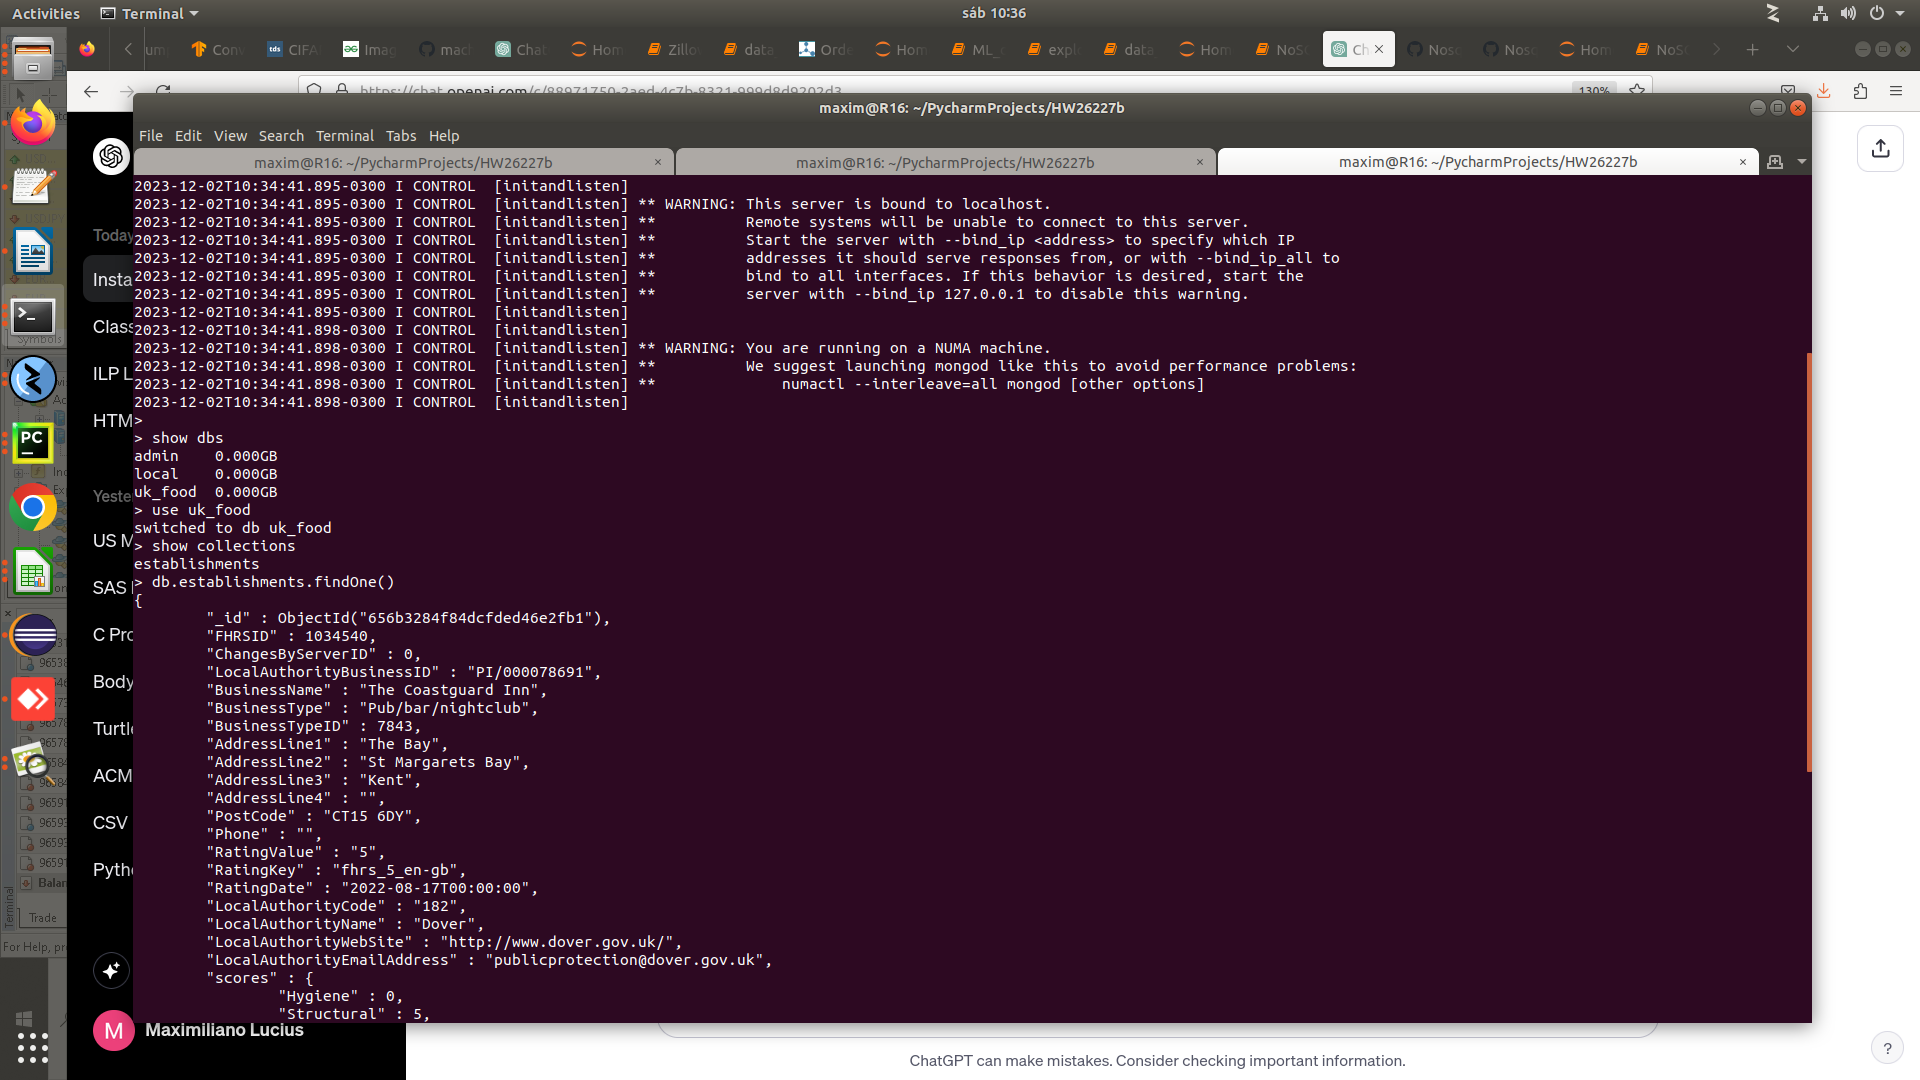

In [2]:
from IPython.display import display, Image

image_path = 'Screenshot from 2023-12-02 10-36-16.png'

# Display the image
img = Image(filename=image_path)
display(img)


In [3]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [4]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [5]:
# review the collections in our database
print(db.list_collection_names())

['establishments']


In [6]:
# assign the collection to a variable
establishments = db['establishments']

## Part 3: Exploratory Analysis
Unless otherwise stated, for each question: 
* Use `count_documents` to display the number of documents contained in the result.
* Display the first document in the results using `pprint`.
* Convert the result to a Pandas DataFrame, print the number of rows in the DataFrame, and display the first 10 rows.

### 1. Which establishments have a hygiene score equal to 20?

In [7]:
# Find the establishments with a hygiene score of 20
query ={'scores.Hygiene':{'$eq': 20}}
res = establishments.find(query)

# Use count_documents to display the number of documents in the result
docs_count = establishments.count_documents(query)
print(f'There are {docs_count} documents in the result.\n')

# Display the first document in the results using pprint
pprint(res[0])

There are 41 documents in the result.

{'AddressLine1': '5-6 Southfields Road',
 'AddressLine2': 'Eastbourne',
 'AddressLine3': 'East Sussex',
 'AddressLine4': '',
 'BusinessName': 'The Chase Rest Home',
 'BusinessType': 'Caring Premises',
 'BusinessTypeID': 5,
 'ChangesByServerID': 0,
 'Distance': 4613.888288172291,
 'FHRSID': 110681,
 'LocalAuthorityBusinessID': '4029',
 'LocalAuthorityCode': '102',
 'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
 'LocalAuthorityName': 'Eastbourne',
 'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'BN21 1BU',
 'RatingDate': '2021-09-23T00:00:00',
 'RatingKey': 'fhrs_0_en-gb',
 'RatingValue': '0',
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('656b7286f84dcfded471ecc4'),
 'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/110681',
            'rel': 'self'}],
 'meta': {'

In [8]:
# Convert the result to a Pandas DataFrame
data = pd.DataFrame(res)

# Display the number of rows in the DataFrame
print(f"The number of rows in the DataFrame is: {data.shape[0]}")

# Display the first 10 rows of the DataFrame
display(data.head(10))

The number of rows in the DataFrame is: 41


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,656b7286f84dcfded471ecc4,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,656b7286f84dcfded471f045,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,656b7287f84dcfded471f350,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,656b7287f84dcfded471f53e,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,656b7287f84dcfded471f54d,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,656b7287f84dcfded471fef6,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,656b7287f84dcfded4720110,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,656b7287f84dcfded4721641,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,656b7287f84dcfded4721a87,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

In [9]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
query ={ 'LocalAuthorityName': {'$regex':'London'}, 'RatingValue': {'$gte': '4'} }
res = establishments.find(query)

# Use count_documents to display the number of documents in the result
ct = establishments.count_documents(query)

print(f'There are {ct} establishments with London as the Local Authority and has a RatingValue greater than or equal to 4\n')

# Display the first document in the results using pprint
pprint(res[0])


There are 34 establishments with London as the Local Authority and has a RatingValue greater than or equal to 4

{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
 'AddressLine2': 'Sheppy Kent',
 'AddressLine3': '',
 'AddressLine4': '',
 'BusinessName': "Charlie's",
 'BusinessType': 'Other catering premises',
 'BusinessTypeID': 7841,
 'ChangesByServerID': 0,
 'Distance': 4627.439467780196,
 'FHRSID': 621707,
 'LocalAuthorityBusinessID': 'PI/000025307',
 'LocalAuthorityCode': '508',
 'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
 'LocalAuthorityName': 'City of London Corporation',
 'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'ME12',
 'RatingDate': '2021-10-18T00:00:00',
 'RatingKey': 'fhrs_4_en-gb',
 'RatingValue': '4',
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('656b7287f84dcfded47206e4'),
 'geocode': {'latitude': 51.369321, 'longitude': 

In [10]:
# Convert the result to a Pandas DataFrame
data1 = pd.DataFrame(res)

# Display the number of rows in the DataFrame
print(f'The number of rows in the DataFrame is: {data1.shape[0]}\n')

# Display the first 10 rows of the DataFrame
display(data1.head(10))

The number of rows in the DataFrame is: 34



,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,656b7287f84dcfded47206e4,621707,0,PI/000025307,Charlie's,Other catering premises,7841,Oak Apple Farm Building 103 Sheernes Docks,Sheppy Kent,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,"{'longitude': 0.508551, 'latitude': 51.369321}",,4627.439468,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,656b7287f84dcfded4720a0c,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.249255999922752, 'latitude': 5...",,4627.873179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,656b7287f84dcfded472155c,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.561954, 'latitude': 51.543831}",,4631.968418,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,656b7287f84dcfded472235f,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.346325, 'latitude': 51.464078}",,4636.847650,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,656b7287f84dcfded4722360,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.346336990594864, 'latitude': 5...",,4636.846754,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
5,656b7287f84dcfded4722a69,294900,0,PI/000019066,Mv Valulla,Other catering premises,7841,Reeds River Cruises LtdKings ReachRiver Thames...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.287555, 'latitude': 51.504071}",,4640.460834,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
6,656b7288f84dcfded4724b7c,1252616,0,PI/000035653,Froottree,Other catering premises,7841,Tereza Joanne King George V Lock,Woolwich Manor Way London,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': None, 'Structural': None, 'Confide...",FHRS,"{'longitude': 0.0693250000476837, 'latitude': ...",,4648.300000,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
7,656b7288f84dcfded4724b7f,293756,0,PI/000002538,Tereza Joanne,Other catering premises,7841,Funcraft UK Ltd King George V Dock Woolwich Ma...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.069286, 'latitude': 51.501121}",,4648.301822,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http

### 3. What are the top 5 establishments with a `RatingValue` rating value of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [11]:
BusinessName = "Penang Flavours"
query ={ 'BusinessName': BusinessName }
res = establishments.find(query)

establishments.count_documents(query), res[0]

(1,
 {'_id': ObjectId('656b72cfb2586482c814017f'),
  'BusinessName': 'Penang Flavours',
  'BusinessType': 'Restaurant/Cafe/Canteen',
  'BusinessTypeID': 1,
  'NewRatingPending': True,
  'geocode': {'longitude': 0.104916, 'latitude': 51.5898205}})

In [12]:
# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score

degree_search = 0.01
latitude = 51.5898205
longitude = 0.104916

query = {
    'RatingValue':{'$eq': '5'}, 
    'geocode.longitude': {
        '$gte': longitude-degree_search, 
        '$lte': longitude+degree_search},
    'geocode.latitude': {
        '$gte': latitude-degree_search, 
        '$lte': latitude+degree_search}
} 

# Sort hygiene score
sort = [('scores.Hygiene',1)]

# Print the results
res = establishments.find(query).sort('scores.Hygiene',1)

pprint(list(res))

[{'AddressLine1': '1 Spearpoint Gardens',
  'AddressLine2': 'Aldborough Road North',
  'AddressLine3': '',
  'AddressLine4': 'Newbury Park',
  'BusinessName': 'Adventures Day Nursery',
  'BusinessType': 'Caring Premises',
  'BusinessTypeID': 5,
  'ChangesByServerID': 0,
  'Distance': 4650.060352183435,
  'FHRSID': 1285418,
  'LocalAuthorityBusinessID': '200715',
  'LocalAuthorityCode': '526',
  'LocalAuthorityEmailAddress': 'themis.skouros@redbridge.gov.uk',
  'LocalAuthorityName': 'Redbridge',
  'LocalAuthorityWebSite': 'http://www.redbridge.gov.uk/',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'IG2 7SX',
  'RatingDate': '2022-02-28T00:00:00',
  'RatingKey': 'fhrs_5_en-gb',
  'RatingValue': '5',
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('656b7288f84dcfded4725388'),
  'geocode': {'latitude': 51.5804595947266, 'longitude': 0.100901998579502},
  'links': [{'href': 'http://api.ratings.food.gov.uk/establishments/1285418',
             'rel': 'self'}],
  

In [13]:
# Convert result to Pandas DataFrame
data2 = pd.DataFrame(establishments.find(query).sort('scores.Hygiene',1))
data2.head(6)

,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,656b7288f84dcfded4725388,1285418,0,200715,Adventures Day Nursery,Caring Premises,5,1 Spearpoint Gardens,Aldborough Road North,,...,http://www.redbridge.gov.uk/,themis.skouros@redbridge.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.100901998579502, 'latitude': 5...",,4650.060352,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
1,656b7288f84dcfded47254db,443904,0,176094,Leyswood Local Ltd,Retailers - other,4613,,80-82 Leyswood Drive,,...,http://www.redbridge.gov.uk/,themis.skouros@redbridge.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.095357, 'latitude': 51.580046}",,4650.246880,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,656b7288f84dcfded47251e8,1340006,0,201062,Autograph at King George Hospital,Restaurant/Cafe/Canteen,1,King George Hospital,167 Barley Lane,,...,http://www.redbridge.gov.uk/,themis.skouros@redbridge.gov.uk,"{'Hygiene': 5, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.112126, 'latitude': 51.5805458}",,4649.655263,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,656b7288f84dcfded47251e9,443264,0,151558,Mitie at King George Hospital,Caring Premises,5,,167 Barley Lane,,...,http://www.redbridge.gov.uk/,themis.skouros@redbridge.gov.uk,"{'Hygiene': 5, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.112095, 'latitude': 51.580555}",,4649.656728,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,656b7288f84dcfded47254a3,443089,0,150390,Miller & Carter at the Dick Turpin,Pub/bar/nightclub,7843,,Aldborough Road North,,...,http://www.redbridge.gov.uk/,themis.skouros@redbridge.gov.uk,"{'Hygiene': 5, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.102708, 'latitude': 51.586074}",,4650.200760,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
5,656b7288f84dcfded47256bf,443095,0,150433,Fairlop Waters Bar & Marquee,Pub/bar/nightclub,7843,Fairlop Waters Country Park,Forest Road,,...,http://www.redbridge.gov.uk/,themis.skouros@redbridge.gov.uk,"{'Hygiene': 5, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.104644, 'latitude': 51.597982}",,4650.567545,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

In [14]:
# Create a pipeline that: 
# 1. Matches establishments with a hygiene score of 0
# 2. Groups the matches by Local Authority
# 3. Sorts the matches from highest to lowest

# Print the number of documents in the result


# Create a pipeline that: 
# 1. Matches establishments with a hygiene score of 0
query0 = {'$match': {'scores.Hygiene': {'$eq': 0}}}
# 2. Groups the matches by Local Authority
query1 = {'$group': {'_id': "$LocalAuthorityName", 'count': { '$sum': 1 }}}
# 3. Sorts the matches from highest to lowest
sort_vals = {'$sort': { 'count': -1 }}

pipeline = [query0, query1, sort_vals]
res = list(establishments.aggregate(pipeline))

# Print the number of documents in the result
print(f"Number of establishments in result is {len(res)}\n")

# Print the first 10 results
pprint(res[:10])


Number of establishments in result is 55

[{'_id': 'Thanet', 'count': 1130},
 {'_id': 'Greenwich', 'count': 882},
 {'_id': 'Maidstone', 'count': 713},
 {'_id': 'Newham', 'count': 711},
 {'_id': 'Swale', 'count': 686},
 {'_id': 'Chelmsford', 'count': 680},
 {'_id': 'Medway', 'count': 672},
 {'_id': 'Bexley', 'count': 607},
 {'_id': 'Southend-On-Sea', 'count': 586},
 {'_id': 'Tendring', 'count': 542}]


In [15]:
# Convert the result to a Pandas DataFrame
data3 = pd.DataFrame(res)

# Display the number of rows in the DataFrame
display(f"The dataframe has {data3.shape[0]} rows.")

# Display the first 10 rows of the DataFrame
pprint(data3.head(10))

'The dataframe has 55 rows.'

               _id  count
0           Thanet   1130
1        Greenwich    882
2        Maidstone    713
3           Newham    711
4            Swale    686
5       Chelmsford    680
6           Medway    672
7           Bexley    607
8  Southend-On-Sea    586
9         Tendring    542
